

# **Questions to Answer**



1.   What is the biggest predictor of a large CO2 output per capita of a country?

1.   Which countries are making the biggest strides in decreasing CO2 output?

1.   Which non-fossil fuel energy technology will have the best price in the future?









In [ ]:

# om de vragen te beantwoorden heb ik verschillende soorten data nodig
# we beginnen met het importeren van de benodigde modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [ ]:
#vervolgens laden we de benodigde data en geven we deze een makkelijkere naam
CO2_file = 'https://raw.githubusercontent.com/Marianvan/CO2final/main/co-emissions-per-capita.csv'
gdp_file = 'https://raw.githubusercontent.com/Marianvan/CO2final/main/gdp-per-capita-maddison.csv'
fuel_file = 'https://raw.githubusercontent.com/Marianvan/CO2final/main/electricity-fossil-renewables-nuclear-line.csv'
emissions_file = 'https://raw.githubusercontent.com/Marianvan/CO2final/main/annual-co2-emissions-per-country(1).csv'
cost_file = 'https://raw.githubusercontent.com/Marianvan/CO2final/main/levelized-cost-of-energy.csv'

CO2 = pd.read_csv(CO2_file)
gdp = pd.read_csv(gdp_file)
fuel = pd.read_csv(fuel_file)
emissions = pd.read_csv(emissions_file)
cost = pd.read_csv(cost_file)

We beginnen met vraag 1:

What is the biggest predictor of a large CO2 output per capita of a country?

In [ ]:
#we kijken naar GDP per capita
#we verwijderen de data welke we niet nodig hebben
gdp = gdp.loc[~(gdp['Code'].isna()) & (gdp['Entity']!='World')]
gdp = gdp.drop(columns=['Code', '900793-annotations'])
# we hernoemen de column zoals wij dat willen
gdp.columns = ['country', 'year', 'GDP_per_capita']

print(gdp)


           country  year  GDP_per_capita
0      Afghanistan  1950       1156.0000
1      Afghanistan  1951       1170.0000
2      Afghanistan  1952       1189.0000
3      Afghanistan  1953       1240.0000
4      Afghanistan  1954       1245.0000
...            ...   ...             ...
21581     Zimbabwe  2018       1900.1992
21582     Zimbabwe  2019       1753.0244
21583     Zimbabwe  2020       1585.9728
21584     Zimbabwe  2021       1687.2532
21585     Zimbabwe  2022       1703.5294

[21293 rows x 3 columns]


In [ ]:
#Vervolgens gaan we kijken naar CO2 per capita
#ook hier verwijderen we de data welke we niet nodig hebben
CO2 = CO2.loc[~(CO2['Code'].isna()) & (CO2['Entity']!='World')]
CO2 = CO2.drop(columns=['Code'])
# we hernoemen de column zoals wij praktisch vinden
CO2.columns = ['country', 'year', 'CO2_per_capita']

# We verwijderen 0 waardes en uitschieters:
CO2 = CO2.loc[(CO2['CO2_per_capita']<100) & (CO2['CO2_per_capita']>0)]
print(CO2)

           country  year  CO2_per_capita
0      Afghanistan  1949        0.001992
1      Afghanistan  1950        0.011266
2      Afghanistan  1951        0.012098
3      Afghanistan  1952        0.011946
4      Afghanistan  1953        0.013685
...            ...   ...             ...
26595     Zimbabwe  2018        0.711830
26596     Zimbabwe  2019        0.636645
26597     Zimbabwe  2020        0.500945
26598     Zimbabwe  2021        0.524972
26599     Zimbabwe  2022        0.542628

[21088 rows x 3 columns]


In [ ]:
#vervolgens gaan we deze 2 datasets samenvoegen

gdp_CO2 = pd.merge(gdp,CO2, on=['country', 'year']).sort_values(by=['country', 'year'])

#we checken op foutieve waarde
gdp_CO2.isna().sum()

print(gdp_CO2)

           country  year  GDP_per_capita  CO2_per_capita
0      Afghanistan  1950       1156.0000        0.011266
1      Afghanistan  1951       1170.0000        0.012098
2      Afghanistan  1952       1189.0000        0.011946
3      Afghanistan  1953       1240.0000        0.013685
4      Afghanistan  1954       1245.0000        0.013511
...            ...   ...             ...             ...
14654     Zimbabwe  2018       1900.1992        0.711830
14655     Zimbabwe  2019       1753.0244        0.636645
14656     Zimbabwe  2020       1585.9728        0.500945
14657     Zimbabwe  2021       1687.2532        0.524972
14658     Zimbabwe  2022       1703.5294        0.542628

[14659 rows x 4 columns]


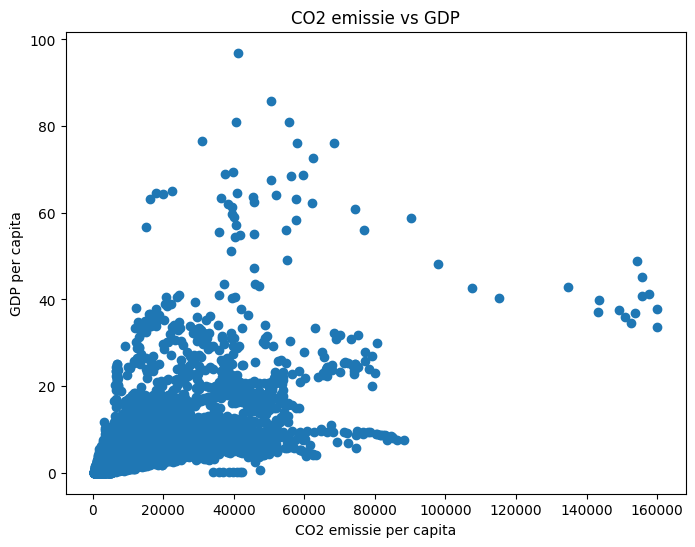

In [ ]:
#nu gaan we visueel maken wat we zojuist in een tabel hebben gezet
#hieruit blijkt een samenhang tussen GDP en CO2 uitstoot.
fig, ax = plt.subplots()
ax.scatter(gdp_CO2['GDP_per_capita'],gdp_CO2['CO2_per_capita'])
ax.set_title('CO2 emissie vs GDP')
ax.set_xlabel('CO2 emissie per capita')
ax.set_ylabel('GDP per capita')
fig.set_size_inches(8,6)

plt.show()

In [ ]:
#onderstaand laat zien dat er een sterke relatie is tussen GDP en CO2
pearson_cor = pearsonr(gdp_CO2['CO2_per_capita'], gdp_CO2['GDP_per_capita'])
display(pearson_cor)

PearsonRResult(statistic=0.6753557192271027, pvalue=0.0)

In [ ]:
#laten we nu eens gaan kijken naar CO2 uitstoot in combinatie met fossiele energie gebruik:
#We gaan weer beginnen met het opschonen en leesbaar maken van de data:
#we kijken naar de soort brandstof
#we verwijderen de data welke we niet nodig hebben
fuel = fuel.loc[~(fuel['Code'].isna()) & (fuel['Entity']!='World')]
fuel = fuel.drop(columns=['Code', 'Nuclear - % electricity', 'Renewables - % electricity'])
# we hernoemen de column zoals wij praktisch vinden
fuel.columns = ['country', 'year', 'fossil']
# Drop 0 values and outliers:
fuel = fuel.loc[(fuel['fossil']<100) & (fuel['fossil']>0)]
print(fuel)



          country  year     fossil
24    Afghanistan  2000  35.416668
25    Afghanistan  2001  27.536232
26    Afghanistan  2002  21.126762
27    Afghanistan  2003  30.769230
28    Afghanistan  2004  29.113924
...           ...   ...        ...
7378     Zimbabwe  2018  44.279660
7379     Zimbabwe  2019  48.292110
7380     Zimbabwe  2020  41.430700
7381     Zimbabwe  2021  29.669031
7382     Zimbabwe  2022  32.698770

[4559 rows x 3 columns]


In [ ]:
#nu gaan we de CO2 uitstoot vergelijken met het fossiele brandstof gebruik
#we voegen hiervoor de CO2 data samen met de brandstof data

CO2_fuel = pd.merge(CO2,fuel, on=['country', 'year']).sort_values(by=['country', 'year'])

#we checken wederom op foutieve waarde

CO2_fuel.isna().sum()

print(CO2_fuel)

          country  year  CO2_per_capita     fossil
0     Afghanistan  2000        0.053581  35.416668
1     Afghanistan  2001        0.054300  27.536232
2     Afghanistan  2002        0.063856  21.126762
3     Afghanistan  2003        0.068871  30.769230
4     Afghanistan  2004        0.052529  29.113924
...           ...   ...             ...        ...
4311     Zimbabwe  2018        0.711830  44.279660
4312     Zimbabwe  2019        0.636645  48.292110
4313     Zimbabwe  2020        0.500945  41.430700
4314     Zimbabwe  2021        0.524972  29.669031
4315     Zimbabwe  2022        0.542628  32.698770

[4316 rows x 4 columns]


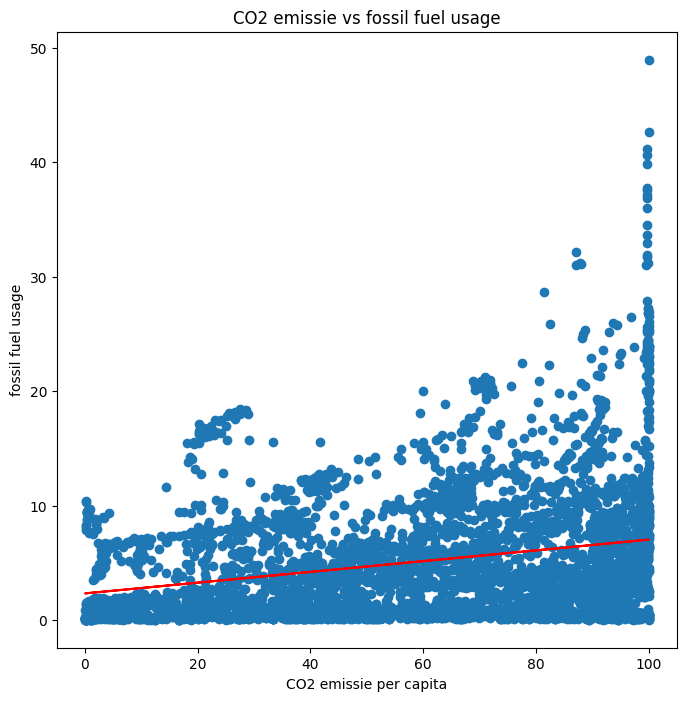

In [ ]:

#nu gaan we visueel maken wat we zojuist in een tabel hebben gezet
#hieruit blijkt een  samenhang tussen fossiele brandstof gebruik en CO2 uitstoot.
fig, ax = plt.subplots()
ax.scatter(CO2_fuel.loc[~CO2_fuel['fossil'].isna(), 'fossil'],CO2_fuel.loc[~CO2_fuel['fossil'].isna(), 'CO2_per_capita'])
ax.set_title('CO2 emissie vs fossil fuel usage')
ax.set_xlabel('CO2 emissie per capita')
ax.set_ylabel('fossil fuel usage')


x = CO2_fuel.loc[~CO2_fuel['fossil'].isna(), 'fossil']
y = CO2_fuel.loc[~CO2_fuel['fossil'].isna(), 'CO2_per_capita']
m, b = np.polyfit(x, y, 1)

ax.plot(x, m*x + b, color='red', label='Regressielijn')

fig.set_size_inches(8,8)



plt.show()

Er lijkt dus een aanzienlijke samenhang te zijn tussen fossiele uitstoot en CO2 emissie!
Let op, ik heb niet alle mogelijke data met elkaar vergeleken, dus zorg ervoor dat je deze data behandeld als mogelijke input, maar ga hier geen belangrijke conclusies uit trekken aub ;)



Laten we verder gaan naar vraag 2!

"Which countries are making the biggest strides in decreasing CO2 output?"

Om dit te beanwoorden hebben we 2 datasets nodig. We moeten weten hoeveel CO2 landen de afgelopen jaren uitgestoten hebben, en we moeten weten hoe de populatie in een land verloopt.
Hieruit kun je dan zien hoe de CO2 uitstoot per persoon verloopt.
Gelukkig voor ons is deze data al beschikbaar, en hoeven we deze alleen maar te bewerken zodat we zien in welke landen de uitstoot het hardst afneemt.



In [ ]:
# we hebben deze data al gebruikt voor onze vorige vraag, dus hier hoeven we nu minder bewerkingen op te doen

print(CO2)


           country  year  CO2_per_capita
0      Afghanistan  1949        0.001992
1      Afghanistan  1950        0.011266
2      Afghanistan  1951        0.012098
3      Afghanistan  1952        0.011946
4      Afghanistan  1953        0.013685
...            ...   ...             ...
26595     Zimbabwe  2018        0.711830
26596     Zimbabwe  2019        0.636645
26597     Zimbabwe  2020        0.500945
26598     Zimbabwe  2021        0.524972
26599     Zimbabwe  2022        0.542628

[21088 rows x 3 columns]


In [ ]:

# wat is het meest recente jaar waar data van beschikbaar is?
last_year = CO2['year'].max()
print(last_year)

2022


In [ ]:
# we willen vooral zien welke landen de laatste 20 jaar veranderingen laten zien, dus laten we de data hier op selecteren
CO2_compare = CO2.loc[(CO2['year']==2002) | (CO2['year']==2022)]

#controleer of alle landen data van 2002 en 2022 beschikbaar hebben
country_counts = CO2_compare['country'].value_counts()
print(country_counts)

# we zien dat Kosovo maar 1 data beschikbaar heeft, dus deze moeten we buiten beschouwing laten


country
Afghanistan      2
Nepal            2
New Caledonia    2
New Zealand      2
Nicaragua        2
                ..
Ghana            2
Greece           2
Greenland        2
Zimbabwe         2
Kosovo           1
Name: count, Length: 214, dtype: int64


In [ ]:
#nu willen we graag zien wat het verschil is per land, tussen 2002 en 2022
pivot_df = CO2_compare.pivot(index='country', columns='year', values='CO2_per_capita')
pivot_df['difference'] = pivot_df[2022] - pivot_df[2002]
pivot_df.reset_index(inplace=True)
print(pivot_df)



year            country      2002      2022  difference
0           Afghanistan  0.063856  0.295364    0.231508
1               Albania  1.200002  1.743200    0.543198
2               Algeria  2.867771  3.927226    1.059456
3               Andorra  7.496755  4.617124   -2.879631
4                Angola  0.918011  0.451552   -0.466459
..                  ...       ...       ...         ...
209             Vietnam  0.862175  3.499517    2.637342
210   Wallis and Futuna  1.708500  2.281908    0.573408
211               Yemen  0.843381  0.337017   -0.506364
212              Zambia  0.186604  0.445701    0.259097
213            Zimbabwe  0.992590  0.542628   -0.449962

[214 rows x 4 columns]


In [ ]:
#nu moeten we de top 5 zichtbaar maken
top_5 = pivot_df.sort_values(by='difference', ascending=True).head(5)

print(top_5)

year     country       2002       2022  difference
156        Qatar  63.189850  37.601273  -25.588577
49       Curacao  34.647230   9.189007  -25.458223
9          Aruba  26.542625   8.133404  -18.409221
112   Luxembourg  22.382103  11.618432  -10.763671
68       Finland  12.506471   6.526740   -5.979731


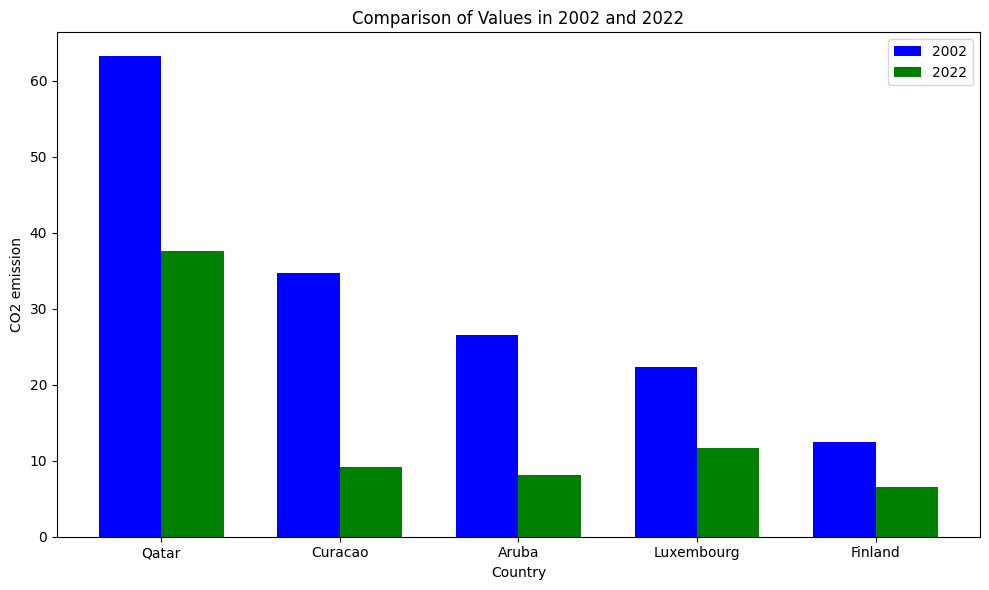

In [ ]:
# Gegevens
data = {
    'country': ['Qatar', 'Curacao', 'Aruba', 'Luxembourg', 'Finland'],
    '2002': [63.189850, 34.647230, 26.542625, 22.382103, 12.506471],
    '2022': [37.601273, 9.189007, 8.133404, 11.618432, 6.526740],
    'difference': [-25.588577, -25.458223, -18.409221, -10.763671, -5.979731],
}

#we maken een dataframe
df = pd.DataFrame(data)

# Plotten de gegevens
plt.figure(figsize=(10, 6))

# Bar plots voor 2002 en 2022
bar_width = 0.35
index = range(len(df['country']))

# Bar plots voor 2002
plt.bar(index, df['2002'], bar_width, label='2002', color='b')
# Bar plots voor 2022, verzonden naar rechts
plt.bar([i + bar_width for i in index], df['2022'], bar_width, label='2022', color='g')

# Labels en titel toevoegen
plt.xlabel('Country')
plt.ylabel('CO2 emission')
plt.title('Comparison of Values in 2002 and 2022')
plt.xticks([i + bar_width / 2 for i in index], df['country'])
plt.legend()

# Grafiek tonen
plt.tight_layout()
plt.show()

**Conclusie vraag 2:**

Het antwoord op de vraag welke landen de grootste stappen hebben gemaakt in het verminderen van de CO2 uitstoot tussen 2002 en 2022 is dus:
Qatar, Curacao, Aruba, Luxembourgh, Finland



Vraag 3

**Which non-fossil fuel energy technology will have the best price in the future?**

In [ ]:
# Selecteren data:
cost = cost.loc[cost['Entity']=='World'].copy()

# verwijderen onnodige columns:
cost.drop(columns=['Code'], inplace=True)

# hernoemen de columns naar handigere benamingen:
cost.columns = ['country', 'year', 'bio-energy', 'geothermal', 'offshore wind', 'solar photovoltaic', 'concentrated solar power', 'hydropower', 'onshore wind']

# oplopend naar jaartal
cost = cost.sort_values(by='year')

print(cost)


    country  year  bio-energy  geothermal  offshore wind  solar photovoltaic  \
693   World  1984         NaN         NaN            NaN                 NaN   
694   World  1985         NaN         NaN            NaN                 NaN   
695   World  1986         NaN         NaN            NaN                 NaN   
696   World  1987         NaN         NaN            NaN                 NaN   
697   World  1988         NaN         NaN            NaN                 NaN   
698   World  1989         NaN         NaN            NaN                 NaN   
699   World  1990         NaN         NaN            NaN                 NaN   
700   World  1991         NaN         NaN            NaN                 NaN   
701   World  1992         NaN         NaN            NaN                 NaN   
702   World  1993         NaN         NaN            NaN                 NaN   
703   World  1994         NaN         NaN            NaN                 NaN   
704   World  1995         NaN         Na

slope geothermal: [0.00039414]
slope offshore wind: [-0.00422625]
slope solar photovoltaic: [-0.02827473]
slope concentrated solar power: [-0.02230622]
slope hydropower: [0.00120818]
slope onshore wind: [-0.00670895]


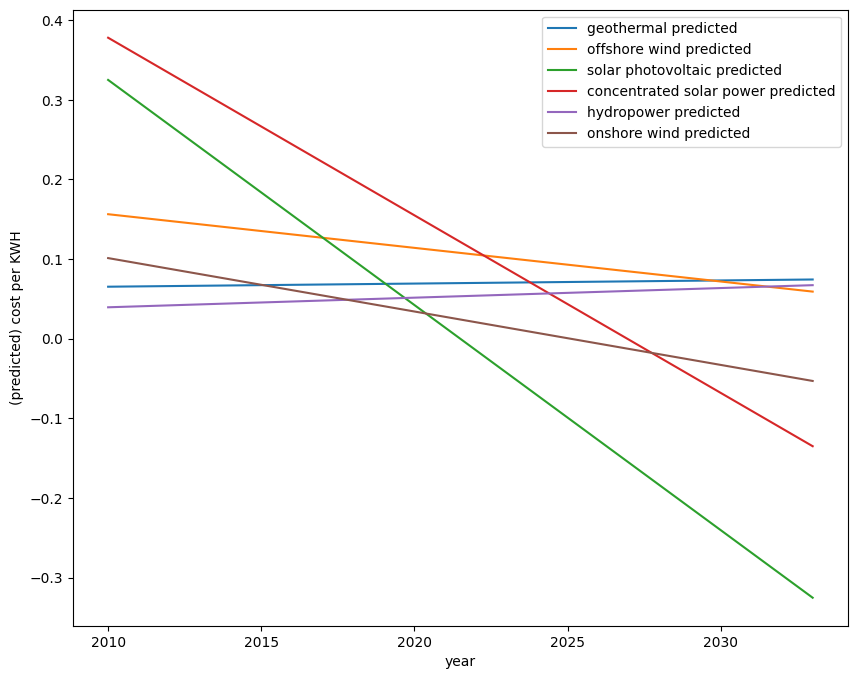

In [ ]:
# We creeren een lineare lijn

sources = cost.columns[3:]

# Met figuur:
fig, ax = plt.subplots()

for source in sources:


  x = np.array(cost.loc[~cost[source].isna(),'year']).reshape((-1, 1))
  y = np.array(cost.loc[~cost[source].isna(), source])


  model = LinearRegression().fit(x, y)

  # We voorspellen de waardes tussen 2010 en 2034
  x_pred = np.array(range(2010,2034)).reshape((-1,1))
  y_pred = model.predict(x_pred)

  # Plot regression lijnen

  ax.plot(x_pred, y_pred, label=str(source)+" predicted")


  print(f"slope {source}: {model.coef_}")

ax.legend(bbox_to_anchor=(1,1))
ax.set_xlabel('year')
ax.set_ylabel('(predicted) cost per KWH')
fig.set_size_inches(10,8)

Op basis hiervan lijkt het er op dat Solar photovoltaic de goedkoopste energiebron zal zijn